Importing libraries

In [ ]:
pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from causalgraphicalmodels import StructuralCausalModel
from causalgraphicalmodels.csm import discrete_model, linear_model

In [ ]:
np.random.seed(10)

# Generating data 

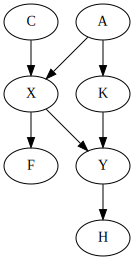

In [ ]:
fd0 = StructuralCausalModel({
    "C": lambda n_samples: np.random.normal(size=n_samples),
    "A": lambda n_samples: .8 * np.random.normal(size=n_samples),
    "K": lambda A, n_samples: A + .1 * np.random.normal(),
    "X": lambda C, A, n_samples: C - 2 * A + .2 * np.random.normal(),
    "F": lambda X, n_samples: 3 * X + .8 * np.random.normal(),
    "Y": lambda K, X, n_samples: 2 * K - X + .2 * np.random.normal(),
    "H": lambda Y, n_samples: .5 * Y + .1 * np.random.normal()
})

fd0.cgm.draw()

C is random so doesn't affect anything

ATE: Average Treatment Effect


How can we know the true causal effect for a linear model like, for example, this one $Y := \alpha X + \beta Z$?

According to our definition of causality, the causal effect is the change in outcome produced by a change in the cause by 1 unit. If we are interested in the causal effect of $X$ on $Y$, then we can do the following calculations:

$ATE = Y(X+1) - Y(X) = (\alpha (X + 1) + \beta Z) - (\alpha X + \beta Z) = \alpha $

Similarly, the causal effect for $Z$ on $Y$ will be $\beta$

For linear models, the causal effect correspond to the coefficient in front of the corresponding causal variable.

What is the true causal effect of $X$ on $Y$ in `fd0` model. Why?

Your answer:

**[HMD-Solution]**

According to the structure defined in the ```fd0``` model, $Y$ is defined as the following:

$Y =  2 \cdot K - 1 \cdot X + 0.2 \cdot Z$, where $Z \sim \mathcal{N}(\mu,\,\sigma^{2})$

The coefficient of X ($\alpha$) is -1.
Therefore, the causal effect of $X$ on $Y$ is -1.
It can also be esimated using a sample from the data as the following:


The true causal effect can be estimated via regression. For example, let us build a regression model $Y = \alpha X + \beta A$

In [ ]:
# generating a sample
data_df = fd0.sample(n_samples=100000)
data_df.head()

,C,A,K,X,F,Y,H
0,1.331587,0.542807,0.519750,0.501984,0.136748,0.456107,0.239288
1,0.715279,-0.417533,-0.440590,1.806358,4.049867,-2.768947,-1.373239
2,-1.545400,-0.293116,-0.316173,-0.703156,-3.478672,-0.010600,0.005935
3,-0.008384,1.250111,1.227055,-2.252595,-8.126989,4.625294,2.323882
4,0.621336,-0.386163,-0.409220,1.649674,3.579816,-2.549523,-1.263526


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data_df[['X', 'A']].values, data_df['Y'].values)
regressor.coef_

array([-1.,  2.])

The first coefficient is the regression coefficient in front of $X$, it corresponds to the true causal effect.

Exercise:

1. Try including other variable into the regression model. In which cases will the estimation be correct?
2. Test all possible cases (30 in total) including the empty set. Note: the set of regressors will always include $X$, as the coefficient in front of this variable shows the estimation of the causal effect; empty set here means a set of regressors with only 1 element $X$. A set of regressors never includes $Y$.

Hint: there might be small deviations from the correct values of causal effect.

Your solution

**[HMD-Solution]**

In [ ]:
all_sets = [
            ['X'],
            ['X', 'C'],
            ['X', 'A'],
            ['X', 'K'],
            ['X', 'F'],
            ['X', 'H'],
            ['X', 'C', 'A'],
            ['X', 'C', 'K'],
            ['X', 'C', 'F'],
            ['X', 'C', 'H'],
            ['X', 'A', 'K'],
            ['X', 'A', 'F'],
            ['X', 'A', 'H'],
            ['X', 'K', 'F'],
            ['X', 'K', 'H'],
            ['X', 'F', 'H'],
            ['X', 'C', 'A', 'K'],
            ['X', 'C', 'A', 'F'],
            ['X', 'C', 'A', 'H'],
            ['X', 'C', 'K', 'F'],
            ['X', 'C', 'K', 'H'],
            ['X', 'C', 'F', 'H'],
            ['X', 'A', 'K', 'F'],
            ['X', 'A', 'K', 'H'],
            ['X', 'K', 'F', 'H'],
            ['X', 'C', 'A', 'K', 'F'],
            ['X', 'C', 'A', 'K', 'H'],
            ['X', 'C', 'K', 'F', 'H'],
            ['X', 'A', 'K', 'F', 'H'],
            ['X', 'C', 'A', 'K', 'F', 'H']
            ]

In [ ]:
coeff_1_vars = []
for varset in all_sets:
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(data_df[varset].values, data_df['Y'].values)
  print(f"Set: {varset}, X has the coefficient: {regressor.coef_[0]}")
  if math.isclose(regressor.coef_[0],-1) == True:
    coeff_1_vars.append(varset)


Set: ['X'], X has the coefficient: -1.7192880971870415
Set: ['X', 'C'], X has the coefficient: -2.000000000000001
Set: ['X', 'A'], X has the coefficient: -1.0000000000000007
Set: ['X', 'K'], X has the coefficient: -1.0000000000000007
Set: ['X', 'F'], X has the coefficient: -0.17192880971870403
Set: ['X', 'H'], X has the coefficient: -1.983873088986714e-16
Set: ['X', 'C', 'A'], X has the coefficient: -1.5000000000000002
Set: ['X', 'C', 'K'], X has the coefficient: -1.5000000000000002
Set: ['X', 'C', 'F'], X has the coefficient: -0.19999999999999996
Set: ['X', 'C', 'H'], X has the coefficient: -0.888888888888889
Set: ['X', 'A', 'K'], X has the coefficient: -1.0000000000000002
Set: ['X', 'A', 'F'], X has the coefficient: -0.09999999999999995
Set: ['X', 'A', 'H'], X has the coefficient: -0.4444444444444441
Set: ['X', 'K', 'F'], X has the coefficient: -0.09999999999999995
Set: ['X', 'K', 'H'], X has the coefficient: -0.4444444444444441
Set: ['X', 'F', 'H'], X has the coefficient: -9.6585522

List of sets that led to correct estimation of the true causal effect of $X$ on $Y$.

In [ ]:
coeff_1_vars

[['X', 'A'], ['X', 'K'], ['X', 'A', 'K']]

Question: Why these particular sets turned out to be the ones leading to accurate estimation of the effect?
My intuition is that these sets include variables that affect both $Y$ and $X$, therefore when they are included, they no longer serve as confounding factors, hence the accurate estimation.

**[HMD-T]**